In [1]:
%run auxiliary.ipynb

C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Preprocessing

In [2]:
print("Setting general dataframe...")
all_releases_df = pd.read_csv('raw_data.csv')
print("Total of instances:", all_releases_df.shape[0])
print("... DONE!")

print("Filtering required columns into X features...")
X = all_releases_df.drop(columns=['instanceID', 'classID', 'releaseID', 
                                  'class_frequency', 'number_of_changes', 'will_change', 'change_probability'])
print("... DONE!")

print("Setting y column containing label of change-proneness...")
y = pd.DataFrame(all_releases_df.loc[:,'will_change'])
print("... DONE!")

print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=5
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Setting general dataframe...
Total of instances: 11576
... DONE!
Filtering required columns into X features...
... DONE!
Setting y column containing label of change-proneness...
... DONE!
Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 8103 X Test set: 3473
y Train set: 8103 y Test set: 3473
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 5
... DONE!



## Statistical Analysis

In [3]:
all_releases_df.describe()

,instanceID,classID,releaseID,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,class_frequency,number_of_changes,will_change,change_probability
count,11576.000000,1.157600e+04,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000
mean,5788.500000,9.148070e+18,4.980736,5.731513,12.279976,0.737474,0.143208,25.408431,0.445836,7.048981,1.235228,3.253455,0.074724,0.027039,0.016102
std,3341.847693,5.334891e+18,2.099896,9.568403,22.150706,1.602837,0.267863,66.493345,5.198372,18.958755,3.239050,1.767779,0.330764,0.162203,0.071078
min,1.000000,1.733956e+15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2894.750000,4.535835e+18,3.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,5788.500000,9.219503e+18,5.000000,3.000000,7.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,8682.250000,1.373644e+19,7.000000,7.000000,13.000000,0.000000,0.000000,21.000000,0.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000
max,11576.000000,1.843342e+19,8.000000,162.000000,488.000000,7.000000,1.000000,1369.000000,189.000000,413.000000,56.000000,8.000000,5.000000,1.000000,0.800000


will_change
0    7884
1     219
Name: will_change, dtype: int64

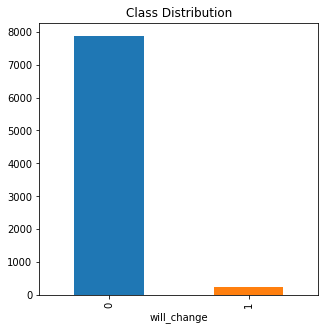

In [4]:
ax = y_train.groupby(['will_change'])['will_change'].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby(['will_change'])['will_change'].count()

In [5]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7
0,1.0,0.22,0.35,0.049,0.41,-0.025,0.89,0.29
1,0.22,1.0,0.028,0.36,0.82,0.061,0.24,0.28
2,0.35,0.028,1.0,0.028,-0.017,0.069,0.31,-0.071
3,0.049,0.36,0.028,1.0,0.32,0.0075,0.14,0.26
4,0.41,0.82,-0.017,0.32,1.0,-0.00018,0.48,0.43
5,-0.025,0.061,0.069,0.0075,-0.00018,1.0,-0.073,-0.052
6,0.89,0.24,0.31,0.14,0.48,-0.073,1.0,0.36
7,0.29,0.28,-0.071,0.26,0.43,-0.052,0.36,1.0


## Imbalanced baseline

In [6]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6833170000576468
2 of KFold 5
ROC AUC score: 0.7051435406698565
3 of KFold 5
ROC AUC score: 0.6497593243788552
4 of KFold 5
ROC AUC score: 0.7233815645356545
5 of KFold 5
ROC AUC score: 0.6846372919371976

CROSS VALIDANTION SUMMARY:
Mean: 0.6892477443158421
Std deviation: 0.024631521805355272

TEST SET:
F1-Score(micro): 0.8255110855168442
F1-Score(macro): 0.5384168989965803
F1-Score(weighted): 0.8827412519425704
F1-Score(None): [0.90244688 0.17438692]
Accuracy: 0.8255110855168443
Sensitivity: 0.6808510638297872
Specificity: 0.8295353654927493
Confusion Matrix: [0.8295353654927493, 0.68]
ROC AUC score: 0.7551932146612683
Wall time: 296 ms


In [7]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5901740935031994
2 of KFold 5
ROC AUC score: 0.5232100651409466
3 of KFold 5
ROC AUC score: 0.5172364097538479
4 of KFold 5
ROC AUC score: 0.5585692050498645
5 of KFold 5
ROC AUC score: 0.5481938377995514

CROSS VALIDANTION SUMMARY:
Mean: 0.547476722249482
Std deviation: 0.026267737201455102

TEST SET:
F1-Score(micro): 0.9211056723293982
F1-Score(macro): 0.540246245062344
F1-Score(weighted): 0.936046061124436
F1-Score(None): [0.95869762 0.12179487]
Accuracy: 0.9211056723293982
Sensitivity: 0.20212765957446807
Specificity: 0.941106836342113
Confusion Matrix: [0.941106836342113, 0.2]
ROC AUC score: 0.5716172479582906
Wall time: 127 ms


In [8]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5545483368882227
2 of KFold 5
ROC AUC score: 0.4904378278664899
3 of KFold 5
ROC AUC score: 0.5286504871159278
4 of KFold 5
ROC AUC score: 0.5586196460483082
5 of KFold 5
ROC AUC score: 0.530965942627789

CROSS VALIDANTION SUMMARY:
Mean: 0.5326444481093474
Std deviation: 0.02430908944818337

TEST SET:
F1-Score(micro): 0.9648718687014108
F1-Score(macro): 0.5144905947491933
F1-Score(weighted): 0.9567932808278286
F1-Score(None): [0.98210619 0.046875  ]
Accuracy: 0.9648718687014108
Sensitivity: 0.031914893617021274
Specificity: 0.9908256880733946
Confusion Matrix: [0.9908256880733946, 0.03]
ROC AUC score: 0.5113702908452079
Wall time: 2.12 s


In [9]:
%%time
NN_(X_train, y_train, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5100954055456275
2 of KFold 5
ROC AUC score: 0.4990488268864933
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5
ROC AUC score: 0.511046578659134
5 of KFold 5
ROC AUC score: 0.5113106480934955

CROSS VALIDANTION SUMMARY:
Mean: 0.50630029183695
Std deviation: 0.005555379692445415

TEST SET:
F1-Score(micro): 0.9723581917650447
F1-Score(macro): 0.492992700729927
F1-Score(weighted): 0.9592987824741857
F1-Score(None): [0.9859854 0.       ]
Accuracy: 0.9723581917650447
Sensitivity: 0.0
Specificity: 0.999408108907961
Confusion Matrix: [0.999408108907961, 0.0]
ROC AUC score: 0.4997040544539805
Wall time: 11.2 s


## Undersampling

In [10]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 438 438


In [11]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7096385542168675
2 of KFold 5
ROC AUC score: 0.6627906976744186
3 of KFold 5
ROC AUC score: 0.8218390804597702
4 of KFold 5
ROC AUC score: 0.6744186046511628
5 of KFold 5
ROC AUC score: 0.35119047619047616

CROSS VALIDANTION SUMMARY:
Mean: 0.643975482638539
Std deviation: 0.15681259795981153

TEST SET:
F1-Score(micro): 0.7555427584221135
F1-Score(macro): 0.4791262905132799
F1-Score(weighted): 0.838030676711113
F1-Score(None): [0.85857071 0.09968187]
Accuracy: 0.7555427584221135
Sensitivity: 0.5
Specificity: 0.762651672092335
Confusion Matrix: [0.762651672092335, 0.5]
ROC AUC score: 0.6313258360461674
Wall time: 83.9 ms


In [12]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5
2 of KFold 5
ROC AUC score: 0.4883720930232558
3 of KFold 5
ROC AUC score: 0.4540229885057471
4 of KFold 5
ROC AUC score: 0.48255813953488375
5 of KFold 5
ROC AUC score: 0.48214285714285715

CROSS VALIDANTION SUMMARY:
Mean: 0.48141921564134876
Std deviation: 0.01513910246476969

TEST SET:
F1-Score(micro): 0.9418370285056148
F1-Score(macro): 0.4994334657624952
F1-Score(weighted): 0.9445470043876555
F1-Score(None): [0.97002078 0.02884615]
Accuracy: 0.9418370285056148
Sensitivity: 0.031914893617021274
Specificity: 0.9671500443918319
Confusion Matrix: [0.9671500443918319, 0.03]
ROC AUC score: 0.4995324690044266
Wall time: 69 ms


In [13]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5
2 of KFold 5
ROC AUC score: 0.5
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5
ROC AUC score: 0.5
5 of KFold 5
ROC AUC score: 0.5

CROSS VALIDANTION SUMMARY:
Mean: 0.5
Std deviation: 0.0

TEST SET:
F1-Score(micro): 0.9712064497552548
F1-Score(macro): 0.5024982523693288
F1-Score(weighted): 0.9592488985908557
F1-Score(None): [0.98538866 0.01960784]
Accuracy: 0.9712064497552548
Sensitivity: 0.010638297872340425
Specificity: 0.9979283811778633
Confusion Matrix: [0.9979283811778633, 0.01]
ROC AUC score: 0.5042833395251018
Wall time: 504 ms


In [14]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5
2 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5
3 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5
4 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5
5 of KFold 5
ROC AUC score: 0.5

CROSS VALIDANTION SUMMARY:
Mean: 0.5
Std deviation: 0.0

TEST SET:
F1-Score(micro): 0.9729340627699395
F1-Score(macro): 0.49314068884997087
F1-Score(weighted): 0.9595867478399376
F1-Score(None): [0.98628138 0.        ]
Accuracy: 0.9729340627699395
Sensitivity: 0.0
Specificity: 1.0
Confusion Matrix: [1.0, 0.0]
ROC AUC score: 0.5
Wall time: 1.91 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


In [15]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 7686 7686


In [16]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7004762967924388
2 of KFold 5
ROC AUC score: 0.7333206009676598
3 of KFold 5
ROC AUC score: 0.6496715828497743
4 of KFold 5
ROC AUC score: 0.7276576576576577
5 of KFold 5
ROC AUC score: 0.6739568135395391

CROSS VALIDANTION SUMMARY:
Mean: 0.697016590361414
Std deviation: 0.0317557201243874

TEST SET:
F1-Score(micro): 0.826662827526634
F1-Score(macro): 0.5381306133557662
F1-Score(weighted): 0.8834232631012311
F1-Score(None): [0.9031843  0.17307692]
Accuracy: 0.826662827526634
Sensitivity: 0.6702127659574468
Specificity: 0.831015093222847
Confusion Matrix: [0.831015093222847, 0.67]
ROC AUC score: 0.750613929590147
Wall time: 210 ms


In [17]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5647763637716753
2 of KFold 5
ROC AUC score: 0.4996180290297938
3 of KFold 5
ROC AUC score: 0.5220422308188265
4 of KFold 5
ROC AUC score: 0.5145405405405405
5 of KFold 5
ROC AUC score: 0.5532681645754304

CROSS VALIDANTION SUMMARY:
Mean: 0.5308490657472533
Std deviation: 0.02438271327735027

TEST SET:
F1-Score(micro): 0.9303196084077167
F1-Score(macro): 0.5337272263275857
F1-Score(weighted): 0.9404727696098929
F1-Score(None): [0.96375075 0.1037037 ]
Accuracy: 0.9303196084077167
Sensitivity: 0.14893617021276595
Specificity: 0.9520568215448357
Confusion Matrix: [0.9520568215448357, 0.15]
ROC AUC score: 0.5504964958788009
Wall time: 110 ms


In [18]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5552801964724269
2 of KFold 5
ROC AUC score: 0.4895117137764196
3 of KFold 5
ROC AUC score: 0.5268375241779496
4 of KFold 5
ROC AUC score: 0.5377207207207207
5 of KFold 5
ROC AUC score: 0.547432156405019

CROSS VALIDANTION SUMMARY:
Mean: 0.5313564623105071
Std deviation: 0.02298991328260899

TEST SET:
F1-Score(micro): 0.9645839331989634
F1-Score(macro): 0.5215101398464321
F1-Score(weighted): 0.9570270193087497
F1-Score(None): [0.98195158 0.0610687 ]
Accuracy: 0.9645839331989634
Sensitivity: 0.0425531914893617
Specificity: 0.9902337969813554
Confusion Matrix: [0.9902337969813554, 0.04]
ROC AUC score: 0.5163934942353586
Wall time: 1.91 s


In [19]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5101064225645605
2 of KFold 5
ROC AUC score: 0.49933155080213903
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5
ROC AUC score: 0.5128468468468469
5 of KFold 5
ROC AUC score: 0.5105339947475928

CROSS VALIDANTION SUMMARY:
Mean: 0.5065637629922278
Std deviation: 0.005712761110733265

TEST SET:
F1-Score(micro): 0.9723581917650447
F1-Score(macro): 0.492992700729927
F1-Score(weighted): 0.9592987824741857
F1-Score(None): [0.9859854 0.       ]
Accuracy: 0.9723581917650447
Sensitivity: 0.0
Specificity: 0.999408108907961
Confusion Matrix: [0.999408108907961, 0.0]
ROC AUC score: 0.4997040544539805
Wall time: 12.9 s


In [20]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 8081 8081


In [21]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6835290363752393
2 of KFold 5
ROC AUC score: 0.7336507936507937
3 of KFold 5
ROC AUC score: 0.6666937742839071
4 of KFold 5
ROC AUC score: 0.7241121081489392
5 of KFold 5
ROC AUC score: 0.6905291678018951

CROSS VALIDANTION SUMMARY:
Mean: 0.6997029760521548
Std deviation: 0.025233400616209652

TEST SET:
F1-Score(micro): 0.8255110855168442
F1-Score(macro): 0.5384168989965803
F1-Score(weighted): 0.8827412519425704
F1-Score(None): [0.90244688 0.17438692]
Accuracy: 0.8255110855168443
Sensitivity: 0.6808510638297872
Specificity: 0.8295353654927493
Confusion Matrix: [0.8295353654927493, 0.68]
ROC AUC score: 0.7551932146612683
Wall time: 243 ms


In [22]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5398978940650926
2 of KFold 5
ROC AUC score: 0.5017460317460317
3 of KFold 5
ROC AUC score: 0.5131291226167887
4 of KFold 5
ROC AUC score: 0.5494054673560553
5 of KFold 5
ROC AUC score: 0.5260042987315715

CROSS VALIDANTION SUMMARY:
Mean: 0.526036562903108
Std deviation: 0.017290894462275483

TEST SET:
F1-Score(micro): 0.9219694788367405
F1-Score(macro): 0.5410728226042784
F1-Score(weighted): 0.9365360070934182
F1-Score(None): [0.9591683  0.12297735]
Accuracy: 0.9219694788367405
Sensitivity: 0.20212765957446807
Specificity: 0.9419946729801717
Confusion Matrix: [0.9419946729801717, 0.2]
ROC AUC score: 0.57206116627732
Wall time: 134 ms


In [23]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5581940012763242
2 of KFold 5
ROC AUC score: 0.501904761904762
3 of KFold 5
ROC AUC score: 0.5254630884611908
4 of KFold 5
ROC AUC score: 0.5325137074612869
5 of KFold 5
ROC AUC score: 0.5195032240486785

CROSS VALIDANTION SUMMARY:
Mean: 0.5275157566304485
Std deviation: 0.018387340116970883

TEST SET:
F1-Score(micro): 0.9640080621940685
F1-Score(macro): 0.527860704633572
F1-Score(weighted): 0.957083014275942
F1-Score(None): [0.98164734 0.07407407]
Accuracy: 0.9640080621940685
Sensitivity: 0.05319148936170213
Specificity: 0.9893459603432968
Confusion Matrix: [0.9893459603432968, 0.05]
ROC AUC score: 0.5212687248524994
Wall time: 2.15 s


In [24]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5287236758136566
2 of KFold 5
ROC AUC score: 0.4990476190476191
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5
ROC AUC score: 0.5102040816326531
5 of KFold 5
ROC AUC score: 0.5115868979505342

CROSS VALIDANTION SUMMARY:
Mean: 0.5099124548888926
Std deviation: 0.01070562710154608

TEST SET:
F1-Score(micro): 0.9723581917650447
F1-Score(macro): 0.492992700729927
F1-Score(weighted): 0.9592987824741857
F1-Score(None): [0.9859854 0.       ]
Accuracy: 0.9723581917650447
Sensitivity: 0.0
Specificity: 0.999408108907961
Confusion Matrix: [0.999408108907961, 0.0]
ROC AUC score: 0.4997040544539805
Wall time: 11.5 s


## Oversampling

In [25]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 15768 15768


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7105263157894738
2 of KFold 5
ROC AUC score: 0.7102092580849715
3 of KFold 5
ROC AUC score: 0.703868103994927
4 of KFold 5
ROC AUC score: 0.7019657577679138
5 of KFold 5
ROC AUC score: 0.7030456852791878

CROSS VALIDANTION SUMMARY:
Mean: 0.7059230241832948
Std deviation: 0.0036803214072510556

TEST SET:
F1-Score(micro): 0.8350129570976101
F1-Score(macro): 0.5477109164856969
F1-Score(weighted): 0.8886745015327111
F1-Score(None): [0.90818779 0.18723404]
Accuracy: 0.8350129570976101
Sensitivity: 0.7021276595744681
Specificity: 0.8387096774193549
Confusion Matrix: [0.8387096774193549, 0.7]
ROC AUC score: 0.7704186684969115
Wall time: 337 ms


In [27]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.959416613823716
2 of KFold 5
ROC AUC score: 0.9454660748256182
3 of KFold 5
ROC AUC score: 0.9521242866201649
4 of KFold 5
ROC AUC score: 0.9502219403931516
5 of KFold 5
ROC AUC score: 0.9559010152284264

CROSS VALIDANTION SUMMARY:
Mean: 0.9526259861782155
Std deviation: 0.004777738131372316

TEST SET:
F1-Score(micro): 0.9110279297437374
F1-Score(macro): 0.512672963300515
F1-Score(weighted): 0.9294233023979627
F1-Score(None): [0.95327385 0.07207207]
Accuracy: 0.9110279297437374
Sensitivity: 0.1276595744680851
Specificity: 0.9328203610535661
Confusion Matrix: [0.9328203610535661, 0.13]
ROC AUC score: 0.5302399677608256
Wall time: 198 ms


In [28]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.962270133164236
2 of KFold 5
ROC AUC score: 0.9502219403931516
3 of KFold 5
ROC AUC score: 0.9533925174381738
4 of KFold 5
ROC AUC score: 0.9530754597336715
5 of KFold 5
ROC AUC score: 0.9590736040609137

CROSS VALIDANTION SUMMARY:
Mean: 0.9556067309580293
Std deviation: 0.004398322021488502

TEST SET:
F1-Score(micro): 0.9450043190325367
F1-Score(macro): 0.5497304191586688
F1-Score(weighted): 0.9487699892526014
F1-Score(None): [0.97160696 0.12785388]
Accuracy: 0.9450043190325367
Sensitivity: 0.14893617021276595
Specificity: 0.9671500443918319
Confusion Matrix: [0.9671500443918319, 0.15]
ROC AUC score: 0.558043107302299
Wall time: 3.96 s


In [29]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7574508560558021
2 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7517438173747621
3 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7400126823081802
4 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7520608750792644
5 of KFold 5
ROC AUC score: 0.748730964467005

CROSS VALIDANTION SUMMARY:
Mean: 0.7499998390570027
Std deviation: 0.005729927169257319

TEST SET:
F1-Score(micro): 0.7903829542182551
F1-Score(macro): 0.5149962401976581
F1-Score(weighted): 0.8606765441937074
F1-Score(None): [0.88045977 0.14953271]
Accuracy: 0.7903829542182551
Sensitivity: 0.6808510638297872
Specificity: 0.7934300088783663
Confusion Matrix: [0.7934300088783663, 0.68]
ROC AUC score: 0.7371405363540768
Wall time: 51.8 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...
X and Y SMO: 15768 15768


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7155992390615091
2 of KFold 5
ROC AUC score: 0.7117945466074825
3 of KFold 5
ROC AUC score: 0.6949904882688649
4 of KFold 5
ROC AUC score: 0.7064045656309448
5 of KFold 5
ROC AUC score: 0.7100253807106599

CROSS VALIDANTION SUMMARY:
Mean: 0.7077628440558923
Std deviation: 0.00703932918526777

TEST SET:
F1-Score(micro): 0.8191765044630003
F1-Score(macro): 0.536082325114435
F1-Score(weighted): 0.8788631504590855
F1-Score(None): [0.89848044 0.17368421]
Accuracy: 0.8191765044630003
Sensitivity: 0.7021276595744681
Specificity: 0.8224326723882806
Confusion Matrix: [0.8224326723882806, 0.7]
ROC AUC score: 0.7622801659813744
Wall time: 334 ms


In [32]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9267596702599873
2 of KFold 5
ROC AUC score: 0.9616360177552314
3 of KFold 5
ROC AUC score: 0.9663918833227648
4 of KFold 5
ROC AUC score: 0.9581483830057069
5 of KFold 5
ROC AUC score: 0.9685913705583757

CROSS VALIDANTION SUMMARY:
Mean: 0.9563054649804134
Std deviation: 0.015214758862644921

TEST SET:
F1-Score(micro): 0.5692484883386122
F1-Score(macro): 0.38663799372519686
F1-Score(weighted): 0.7031949725141515
F1-Score(None): [0.72131148 0.05196451]
Accuracy: 0.5692484883386122
Sensitivity: 0.43617021276595747
Specificity: 0.5729505770938147
Confusion Matrix: [0.5729505770938147, 0.44]
ROC AUC score: 0.5045603949298861
Wall time: 299 ms


In [33]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9416613823715916
2 of KFold 5
ROC AUC score: 0.9781230183893469
3 of KFold 5
ROC AUC score: 0.9812935954343691
4 of KFold 5
ROC AUC score: 0.9720989220038048
5 of KFold 5
ROC AUC score: 0.9809644670050762

CROSS VALIDANTION SUMMARY:
Mean: 0.9708282770408377
Std deviation: 0.014951928107636002

TEST SET:
F1-Score(micro): 0.7719550820616182
F1-Score(macro): 0.48770086940974006
F1-Score(weighted): 0.848649879290459
F1-Score(None): [0.86930693 0.10609481]
Accuracy: 0.7719550820616182
Sensitivity: 0.5
Specificity: 0.7795205682154484
Confusion Matrix: [0.7795205682154484, 0.5]
ROC AUC score: 0.6397602841077242
Wall time: 5.63 s


In [34]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7517438173747623
2 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7511097019657579
3 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7390615091946734
4 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7352568167406469
5 of KFold 5
ROC AUC score: 0.7423857868020305

CROSS VALIDANTION SUMMARY:
Mean: 0.7439115264155742
Std deviation: 0.006540841855438672

TEST SET:
F1-Score(micro): 0.7854880506766484
F1-Score(macro): 0.5090810290422546
F1-Score(weighted): 0.8575066108031846
F1-Score(None): [0.87744695 0.14071511]
Accuracy: 0.7854880506766484
Sensitivity: 0.648936170212766
Specificity: 0.789286771234093
Confusion Matrix: [0.789286771234093, 0.65]
ROC AUC score: 0.7191114707234295
Wall time: 52.1 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...
X and Y ADA: 15729 15729


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6668556080010897
2 of KFold 5
ROC AUC score: 0.7171528016059406
3 of KFold 5
ROC AUC score: 0.6914533448274329
4 of KFold 5
ROC AUC score: 0.7077138179365343
5 of KFold 5
ROC AUC score: 0.684616968032275

CROSS VALIDANTION SUMMARY:
Mean: 0.6935585080806546
Std deviation: 0.01763230675488627

TEST SET:
F1-Score(micro): 0.8122660524042614
F1-Score(macro): 0.5312787724632209
F1-Score(weighted): 0.8745451222610334
F1-Score(None): [0.8941902  0.16836735]
Accuracy: 0.8122660524042614
Sensitivity: 0.7021276595744681
Specificity: 0.8153299792838118
Confusion Matrix: [0.8153299792838118, 0.7]
ROC AUC score: 0.75872881942914
Wall time: 374 ms


In [37]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8716324490878882
2 of KFold 5
ROC AUC score: 0.9335037644792716
3 of KFold 5
ROC AUC score: 0.9146777307478883
4 of KFold 5
ROC AUC score: 0.9242735256210513
5 of KFold 5
ROC AUC score: 0.9341080192692813

CROSS VALIDANTION SUMMARY:
Mean: 0.9156390978410762
Std deviation: 0.02311843453643435

TEST SET:
F1-Score(micro): 0.48027641808234955
F1-Score(macro): 0.3424576307720805
F1-Score(weighted): 0.6271964460640512
F1-Score(None): [0.643492   0.04142326]
Accuracy: 0.48027641808234955
Sensitivity: 0.4148936170212766
Specificity: 0.4820952944658183
Confusion Matrix: [0.4820952944658183, 0.41]
ROC AUC score: 0.4484944557435474
Wall time: 328 ms


In [38]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8757671321292012
2 of KFold 5
ROC AUC score: 0.9459078136032102
3 of KFold 5
ROC AUC score: 0.942685505027052
4 of KFold 5
ROC AUC score: 0.9561053916784173
5 of KFold 5
ROC AUC score: 0.9433269274943139

CROSS VALIDANTION SUMMARY:
Mean: 0.9327585539864389
Std deviation: 0.028900639783780394

TEST SET:
F1-Score(micro): 0.7679239850273539
F1-Score(macro): 0.4806454365992311
F1-Score(weighted): 0.8459996880844743
F1-Score(None): [0.86690885 0.09438202]
Accuracy: 0.7679239850273539
Sensitivity: 0.44680851063829785
Specificity: 0.7768570583012726
Confusion Matrix: [0.7768570583012726, 0.45]
ROC AUC score: 0.6118327844697852
Wall time: 5.96 s


In [39]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7042552821732739
2 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7335814021912346
3 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7004910049779474
4 of KFold 5


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7508124477380187
5 of KFold 5
ROC AUC score: 0.6628266007318185

CROSS VALIDANTION SUMMARY:
Mean: 0.7103933475624585
Std deviation: 0.030231497402220087

TEST SET:
F1-Score(micro): 0.7546789519147711
F1-Score(macro): 0.4859827176003647
F1-Score(weighted): 0.8375028807715416
F1-Score(None): [0.85762032 0.11434511]
Accuracy: 0.7546789519147711
Sensitivity: 0.5851063829787234
Specificity: 0.7593962710861202
Confusion Matrix: [0.7593962710861202, 0.59]
ROC AUC score: 0.6722513270324219
Wall time: 53 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
